Analise dos dados gerados: 

Arquivo criado por Alex Barbosa 

Importando as bibliotecas: 

In [59]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np

Carregando os dados dos arquivos CSV em lista de DF: 

In [60]:
lista_df = []
nomes = []
diretorio = "./"

for ano in os.listdir(diretorio):
    if ano.isdecimal():
        cam_ano = diretorio + ano
        for mes in os.listdir(cam_ano):
            cam_mes = ano + "/" + mes
            for dia in os.listdir(cam_mes):
                if dia.endswith(".csv"):
                    nome_arquivo = "/" + dia
                    print(diretorio+"/"+ano+"/"+"/"+mes+nome_arquivo)
                    nome_df = pd.read_csv(diretorio+"/"+ano+"/"+"/"+mes+nome_arquivo, sep=",", encoding="latin-1")
                    lista_df.append(nome_df)
                    x = dia.rfind(".")
                    nomes.append(dia[:x])
            cam_mes = ""
        cam_ano = ""

.//2021//01 - Janeiro/10_Janeiro_2021.csv
.//2021//01 - Janeiro/11_Janeiro_2021.csv
.//2021//01 - Janeiro/12_Janeiro_2021.csv
.//2021//01 - Janeiro/13_Janeiro_2021.csv
.//2021//01 - Janeiro/14_Janeiro_2021.csv
.//2021//01 - Janeiro/15_Janeiro_2021.csv
.//2021//01 - Janeiro/16_Janeiro_2021.csv
.//2021//01 - Janeiro/17_Janeiro_2021.csv
.//2021//01 - Janeiro/18_Janeiro_2021.csv
.//2021//01 - Janeiro/19_Janeiro_2021.csv
.//2021//01 - Janeiro/1_Janeiro_2021.csv
.//2021//01 - Janeiro/20_Janeiro_2021.csv
.//2021//01 - Janeiro/21_Janeiro_2021.csv
.//2021//01 - Janeiro/22_Janeiro_2021.csv
.//2021//01 - Janeiro/23_Janeiro_2021.csv
.//2021//01 - Janeiro/24_Janeiro_2021.csv
.//2021//01 - Janeiro/25_Janeiro_2021.csv
.//2021//01 - Janeiro/26_Janeiro_2021.csv
.//2021//01 - Janeiro/27_Janeiro_2021.csv
.//2021//01 - Janeiro/28_Janeiro_2021.csv
.//2021//01 - Janeiro/29_Janeiro_2021.csv
.//2021//01 - Janeiro/2_Janeiro_2021.csv
.//2021//01 - Janeiro/30_Janeiro_2021.csv
.//2021//01 - Janeiro/31_Janeiro_202

Concatenando os arquivos em apenas um arquido DataFrame: 

In [61]:
#arquivo concatenado:
df_concat = lista_df[0]
contador = 1
for i in lista_df[1:]:
 print("percentual carregado: " + str(round((contador*100)/len(lista_df), 2)) + "% de 100%")
 df_concat = pd.concat([df_concat, lista_df[contador]])
 contador +=1

percentual carregado: 0.09% de 100%
percentual carregado: 0.18% de 100%
percentual carregado: 0.27% de 100%
percentual carregado: 0.37% de 100%
percentual carregado: 0.46% de 100%
percentual carregado: 0.55% de 100%
percentual carregado: 0.64% de 100%
percentual carregado: 0.73% de 100%
percentual carregado: 0.82% de 100%
percentual carregado: 0.91% de 100%
percentual carregado: 1.0% de 100%
percentual carregado: 1.1% de 100%
percentual carregado: 1.19% de 100%
percentual carregado: 1.28% de 100%
percentual carregado: 1.37% de 100%
percentual carregado: 1.46% de 100%
percentual carregado: 1.55% de 100%
percentual carregado: 1.64% de 100%
percentual carregado: 1.74% de 100%
percentual carregado: 1.83% de 100%
percentual carregado: 1.92% de 100%
percentual carregado: 2.01% de 100%
percentual carregado: 2.1% de 100%
percentual carregado: 2.19% de 100%
percentual carregado: 2.28% de 100%
percentual carregado: 2.37% de 100%
percentual carregado: 2.47% de 100%
percentual carregado: 2.56% de 

Carregando os dados para plotagem dos graficos: 

In [62]:
#Vendas
total_vendas = df_concat.groupby('Loja')['Valor vendido'].sum()

top_10 = total_vendas.sort_values(ascending=False).head(10)

red_10 = total_vendas.sort_values(ascending=False).tail(10)

total_vendas = df_concat['Valor vendido'].sum()

Definindo a posição e cores para os gráficos: 

In [63]:
#Definindo posição para o grafico
posi = np.zeros(len(top_10))
posi[0] = 0.15
#Lista de cores dos graficos: 
lista_cores=['DodgerBlue', 'DarkOrange', 'green', 'red', 'purple', 'SaddleBrown', 'HotPink', 'Gray', 'LawnGreen', 'Aqua']

Plotando o graficocom a porcentagem do Top_10 lojas que mais venderam:

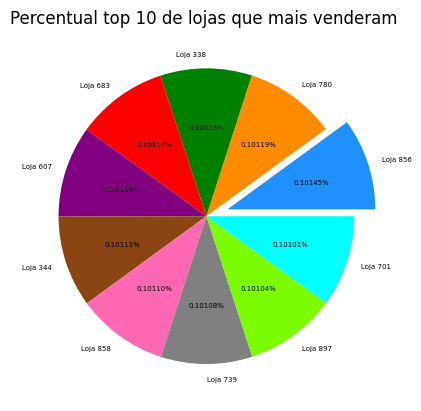

In [64]:
#criando a figura e eixos para o gráfico: 
fig, ax = plt.subplots()
#Plotando o grafico: 
ax.pie(top_10,labels=top_10.index,
       colors=lista_cores,
      explode = posi,
       textprops={'fontsize': 5},
       autopct=lambda p: '{:.5f}%'.format(((sum(top_10)*p/100)/total_vendas)*100)
      )
plt.title("Percentual top 10 de lojas que mais venderam ")
plt.show()

Top_10 que mais venderam em reais:

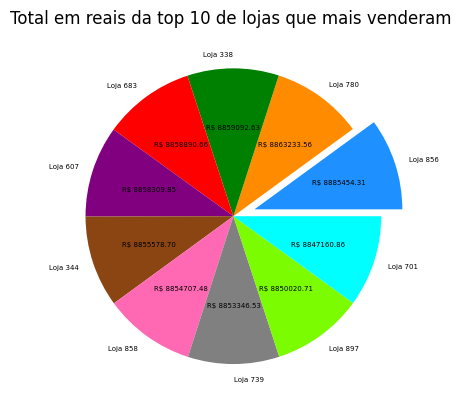

In [65]:
#criando a figura e eixos para o gráfico: 
fig, ax = plt.subplots()
ax.pie(top_10,labels=top_10.index,
       colors=lista_cores,
      explode = posi,
       textprops={'fontsize': 5},
       autopct=lambda p: 'R$ {:.2f}'.format((sum(top_10)*p/100))
      )
plt.title("Total em reais da top 10 de lojas que mais venderam ")
plt.show()


Top_10 de piores rendimentos da franquia, em vendas: 

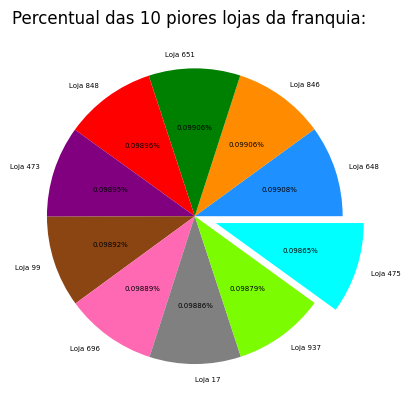

In [66]:
#Red 10 lojas
#as 10 piores lojas da franquia em porcetagem de vendas e valor adquirido: 

#Definindo posição para o grafico
posi = np.zeros(len(red_10))
posi[9] = 0.15

#criando a figura e eixos para o gráfico: 
fig, ax = plt.subplots()
#Plotando o grafico: 
ax.pie(red_10,labels=red_10.index,
       colors=lista_cores,
      explode = posi,
       textprops={'fontsize': 5},
       autopct=lambda p: '{:.5f}%'.format(((sum(red_10)*p/100)/total_vendas)*100)
      )
plt.title("Percentual das 10 piores lojas da franquia:  ")
plt.show()


Top 5 lojas que mais bateram as metas estabelecidas nos dados analisados: 

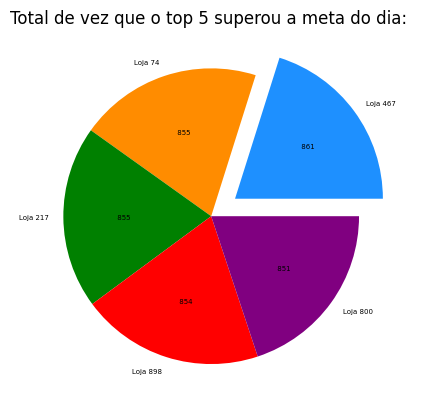

In [67]:
# Calcular valores que superam a meta
df_concat['superou_meta'] = df_concat['Valor vendido'] > df_concat['Meta de Vendas']

# Agrupar por 'loja' e contar valores True na coluna 'superou_meta'
resultado = df_concat.groupby('Loja')['superou_meta'].sum()
top_5 = resultado.sort_values(ascending=False).head()

#Definindo posição para o grafico
posi = np.zeros(len(top_5))
posi[0] = 0.20


#criando a figura e eixos para o gráfico: 
fig, ax = plt.subplots()
#Plotando o grafico: 
ax.pie(top_5, labels=top_5.index,
       colors=lista_cores,
      explode = posi,
       textprops={'fontsize': 5},
       autopct=lambda p: ' {:.0f}'.format((sum(top_5)*p/100))
      )
plt.title("Total de vez que o top 5 superou a meta do dia: ")
plt.show()



As 5 lojas que menos bateram suas metas: 

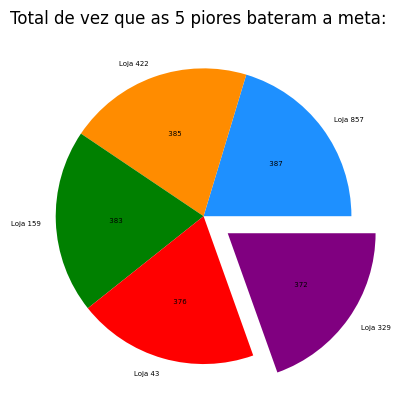

In [68]:
red_5 = resultado.sort_values(ascending=False).tail()

#Definindo posição para o grafico
posi = np.zeros(len(red_5))
posi[4] = 0.20


#criando a figura e eixos para o gráfico: 
fig, ax = plt.subplots()
#Plotando o grafico: 
ax.pie(red_5, labels=red_5.index,
       colors=lista_cores,
      explode = posi,
       textprops={'fontsize': 5},
       autopct=lambda p: ' {:.0f}'.format((sum(red_5)*p/100))
      )
plt.title("Total de vez que as 5 piores bateram a meta:  ")
plt.show()
